In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Limpieza de Datos

In [2]:
df = pd.read_csv("vgsales.csv")
df_raw = df.copy()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
#Vamos a analizar el tipo de datos por columna y si tenemos valores nulos
df.info()
print()
print("Esto nos indica que no tenemos valores nulos dentro de nuestro set de datos, por lo que no vamos a tener que limpiar nulls.")
print("También vemos que los nombres de algunas columnas no son tan amigables para trabajar con ellos, así que los vamos a cambiar.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA Sales      16598 non-null  float64
 7   EU Sales      16598 non-null  float64
 8   JP Sales      16598 non-null  float64
 9   Other Sales   16598 non-null  float64
 10  Global Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

Esto nos indica que no tenemos valores nulos dentro de nuestro set de datos, por lo que no vamos a tener que limpiar nulls.
También vemos que los nombres de algunas columnas no son tan amigables para trabajar con ellos, así que los vamos a cambiar.


In [4]:
#Vamos a cambiar los nombres de las columnas
ind = df.columns.str.replace(' ','_')
df.columns = ind
print(df.columns)
print()
print("Cambiamos los espacios en blanco por '_'")

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Cambiamos los espacios en blanco por '_'


In [5]:
print("Las columnas que tenemos dentro de nuestro data set son las siguientes: ")
print()
print("Datos cualitativos - ordinales")
print("Rank - Indica el ranking en ventas totales (para todos los años en todos los paises).")
print("Year - El año en que se liberó el videojuego.")
print()
print("Datos cualitativos - nominales")
print("Name - El nombre del videojuego.")
print("Platform - La platforma en la que se liberó (PC, PS4, Xbox, etc).")
print("Genre - Género del juego.")
print("Publisher - Empresa que publicó el videojuego.")
print()
print("Datos cuantitativos - intérvalos")
print("NA_Sales - Ventas en Norteamérica (en millones).")
print("EU_Sales - Ventas en Europa (en millones).")
print("JP_Sales - Ventas en Japón (en millones).")
print("Other_Sales - Ventas en el resto del mundo (en millones).")
print("Global_Sales - Total de ventas mundiales (en millones).")

Las columnas que tenemos dentro de nuestro data set son las siguientes: 

Datos cualitativos - ordinales
Rank - Indica el ranking en ventas totales (para todos los años en todos los paises).
Year - El año en que se liberó el videojuego.

Datos cualitativos - nominales
Name - El nombre del videojuego.
Platform - La platforma en la que se liberó (PC, PS4, Xbox, etc).
Genre - Género del juego.
Publisher - Empresa que publicó el videojuego.

Datos cuantitativos - intérvalos
NA_Sales - Ventas en Norteamérica (en millones).
EU_Sales - Ventas en Europa (en millones).
JP_Sales - Ventas en Japón (en millones).
Other_Sales - Ventas en el resto del mundo (en millones).
Global_Sales - Total de ventas mundiales (en millones).


In [6]:
print(len(df))
print("Tenemos casi 16,600 registros, vamos a revisar si trabajamos con el data set completo o nos conviene filtrarlo para obtener información más relevante para analizar.")

16598
Tenemos casi 16,600 registros, vamos a revisar si trabajamos con el data set completo o nos conviene filtrarlo para obtener información más relevante para analizar.


Esta gráfica nos indica que tenemos muchos registros con ventas muy cercanas a 0, entonces vamos a filtrar nuestro data set para solo analizar los registros con más de 1 millon de ventas totales y después volvemos a analizar para ver si es información que podamos analizar de mejor manera.


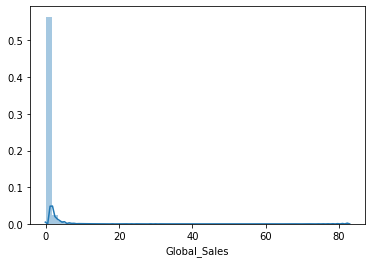

In [7]:
sns.distplot(df['Global_Sales'], bins=50)
print("Esta gráfica nos indica que tenemos muchos registros con ventas muy cercanas a 0, entonces vamos a filtrar nuestro data set para solo analizar los registros con más de 1 millon de ventas totales y después volvemos a analizar para ver si es información que podamos analizar de mejor manera.")

La gráfica sigue muy cargada a la izquierda (valores cercanos a 1 millón, pero con esto podemos empezar a analizar nuestro set de datos.


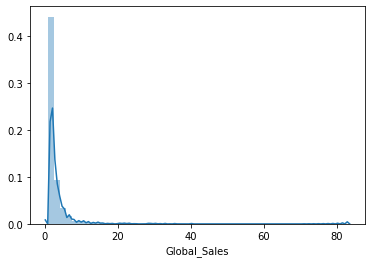

In [8]:
#Filtramos las ventas con valor mayor a 1 (millon)
ventasMayores = df.Global_Sales > 1
df = df[ventasMayores]
#Volvemos a graficar
sns.distplot(df['Global_Sales'], bins=50)
print("La gráfica sigue muy cargada a la izquierda (valores cercanos a 1 millón, pero con esto podemos empezar a analizar nuestro set de datos.")

In [9]:
print("De los 16,600 registros originales, solamente vamos a trabajar con", len(df))

De los 16,600 registros originales, solamente vamos a trabajar con 2054


## Análisis Univariado

Media: 2.768037974683553
Desv. Estándar: 3.674187113694442
Skew: 8.62910130725543
Kurtosis: 131.14062294458904


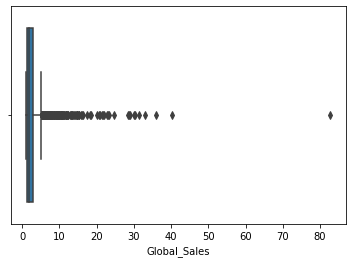

In [10]:
print("Media:", df['Global_Sales'].mean())
print("Desv. Estándar:", df['Global_Sales'].std())
print("Skew:", st.skew(df['Global_Sales']))
print("Kurtosis:", st.kurtosis(df['Global_Sales']))
sns.boxplot(df['Global_Sales'])

Dado que el boxplot no es tan legible al haber tantos valores tan distantes (outliers) del lado derecho, vamos a graficar la info descartándolos


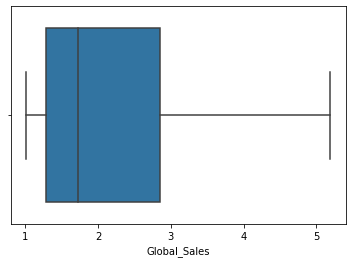

In [11]:
print("Dado que el boxplot no es tan legible al haber tantos valores tan distantes (outliers) del lado derecho, vamos a graficar la info descartándolos")
sns.boxplot(df['Global_Sales'], showfliers=False)

Utilizamos 15 como número de bins para poder demostrar que la densidad de nuestros datos se encuentra entre 0 y 5 como lo demuestra el boxplot anterior.
Al utilizar un número mayor de bins, la gráfica tiende a tener una barra en 0 y el resto casi horizontal, lo cual dificulta el análisis visual.


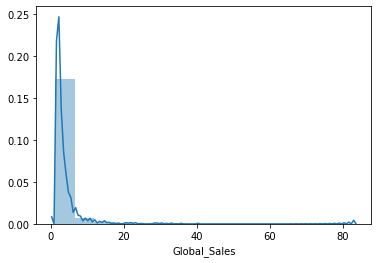

In [12]:
sns.distplot(df['Global_Sales'], bins=15)
print("Utilizamos 15 como número de bins para poder demostrar que la densidad de nuestros datos se encuentra entre 0 y 5 como lo demuestra el boxplot anterior.")
print("Al utilizar un número mayor de bins, la gráfica tiende a tener una barra en 0 y el resto casi horizontal, lo cual dificulta el análisis visual.")

In [13]:
print("Los findings que podemos hacer en base a lo anterior son:")
print("La media es muy cercana a mi valor(2.76) más bajo(1).")
print("Al ser el skew y kurtosis mayores a 0, indica que mi sesgo es del lado derecho.")
print("Mis gráficas me indican que todos mis valores outliers están del lado derecho.")
print("Los rangos normales de los registros que estoy analizando quedan entre 1 y 5 millones en ventas.")

Los findings que podemos hacer en base a lo anterior son:
La media es muy cercana a mi valor(2.76) más bajo(1).
Al ser el skew y kurtosis mayores a 0, indica que mi sesgo es del lado derecho.
Mis gráficas me indican que todos mis valores outliers están del lado derecho.
Los rangos normales de los registros que estoy analizando quedan entre 1 y 5 millones en ventas.


In [14]:
print(st.kurtosis(df['Global_Sales']) / (math.sqrt(24/len(df['Global_Sales']))))
print()
print("Kurtosis dividido entre el error estándar de kurtosis raiz de 24/n es mucho mayor a 1.96, esto nos dice que la distribución no es normal.")

1213.1984341306536

Kurtosis dividido entre el error estándar de kurtosis raiz de 24/n es mucho mayor a 1.96, esto nos dice que la distribución no es normal.


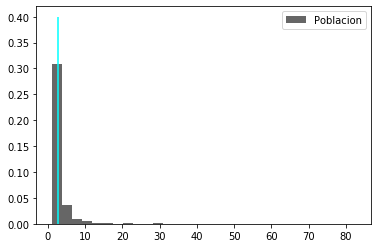

In [15]:
plt.hist(df['Global_Sales'],density=True,label='Poblacion',bins=30,alpha=.6,color='k')
plt.vlines(df['Global_Sales'].mean(),0,.4,color='cyan')
plt.legend()

In [16]:
print("El histograma de matplotlib lo que hace es confirmar lo presentado anteriormente. La densidad de nuestros datos está entre 0 y 5, la media se encuentra dentro de este 0 y 5 (2.7).")

El histograma de matplotlib lo que hace es confirmar lo presentado anteriormente. La densidad de nuestros datos está entre 0 y 5, la media se encuentra dentro de este 0 y 5 (2.7).


## Análisis Bivariado

In [17]:
#Imprimimos las correlaciones de todos los datos cuantitativos de mi dataset
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.029023,-0.487253,-0.490227,-0.328381,-0.392813,-0.547128
Year,-0.029023,1.000000,-0.053946,0.143411,-0.224531,0.186563,-0.004755
NA_Sales,-0.487253,-0.053946,1.000000,0.702348,0.384066,0.542772,0.924973
EU_Sales,-0.490227,0.143411,0.702348,1.000000,0.363730,0.658993,0.875421
JP_Sales,-0.328381,-0.224531,0.384066,0.363730,1.000000,0.191905,0.567008
Other_Sales,-0.392813,0.186563,0.542772,0.658993,0.191905,1.000000,0.683210
Global_Sales,-0.547128,-0.004755,0.924973,0.875421,0.567008,0.683210,1.000000


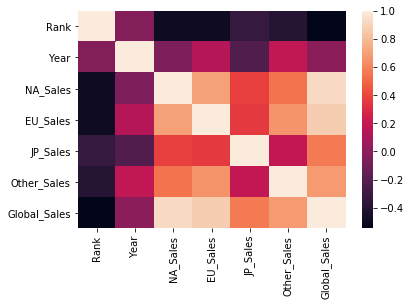

In [18]:
#Graficamos las correlaciones en un heatmap
sns.heatmap(df.corr())

In [19]:
print("Analizando este heatmap nos podemos dar cuenta que las Ventas Globales, tienen una correlación con las Ventas en Norteamérica(NA) y las ventas en Europa(EU).")
print("Podemos observar que las ventas de Norteamérica (NA) son las que tienen mayor impacto o correlación con las ventas globales. Después de esto, las ventas de Europa (EU) son las que más afectan a las ventas globales.")
print()
print("En pocas palabras Norteamérica y Europa son los mercados 1 y 2 para ventas de videojuegos.")

Analizando este heatmap nos podemos dar cuenta que las Ventas Globales, tienen una correlación con las Ventas en Norteamérica(NA) y las ventas en Europa(EU).
Podemos observar que las ventas de Norteamérica (NA) son las que tienen mayor impacto o correlación con las ventas globales. Después de esto, las ventas de Europa (EU) son las que más afectan a las ventas globales.

En pocas palabras Norteamérica y Europa son los mercados 1 y 2 para ventas de videojuegos.


C:\Users\emoreno\AppData\Local\Continuum\anaconda3\envs\CienciaDeDatos\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


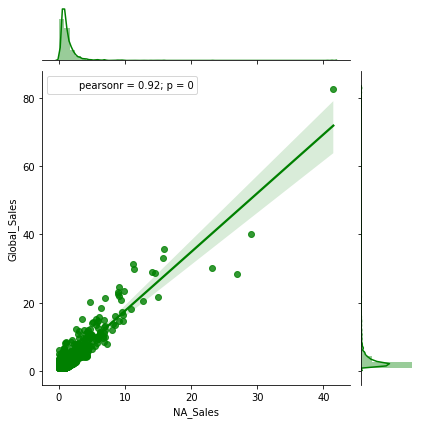

Lo que nos demuestra la gráfica de Pearson precisamente es lo que comentamos anteriormente. Las ventas en Norteamérica presentan una correlación positiva y tienen un coeficiente muy alto (.92) con respecto a las ventas globales. Esto significa que cualquier afectación a las ventas en Norteamérica tendrá una afectación muy alta en las ventas globales.


In [20]:
#Lo comentado anteriormente lo podemos validar con un diagrama de Pearson
sns.jointplot(data=df, x='NA_Sales', y='Global_Sales', kind='reg', color='g', stat_func=st.pearsonr)
plt.show()
print("Lo que nos demuestra la gráfica de Pearson precisamente es lo que comentamos anteriormente. Las ventas en Norteamérica presentan una correlación positiva y tienen un coeficiente muy alto (.92) con respecto a las ventas globales. Esto significa que cualquier afectación a las ventas en Norteamérica tendrá una afectación muy alta en las ventas globales.")

C:\Users\emoreno\AppData\Local\Continuum\anaconda3\envs\CienciaDeDatos\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


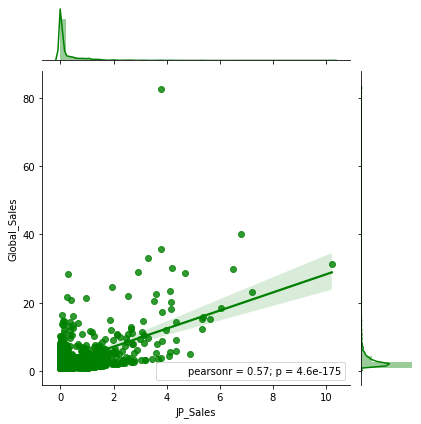

Lo que nos demuestra la gráfica de Pearson es también es lo que comentamos anteriormente. Las ventas en Japón presentan una correlación positiva y tienen un coeficiente de (.57) con respecto a las ventas globales. Esto significa que cualquier afectación a las ventas en Japón tendrá una afectación en las ventas globales.


In [21]:
#Lo comentado anteriormente lo podemos validar con un diagrama de Pearson
sns.jointplot(data=df, x='JP_Sales', y='Global_Sales', kind='reg', color='g', stat_func=st.pearsonr)
plt.show()
print("Lo que nos demuestra la gráfica de Pearson es también es lo que comentamos anteriormente. Las ventas en Japón presentan una correlación positiva y tienen un coeficiente de (.57) con respecto a las ventas globales. Esto significa que cualquier afectación a las ventas en Japón tendrá una afectación en las ventas globales.")

Esta gráfica tiene una forma exponencial negativa. Podemos deducir que Nintendo es el que más ingresos genera.


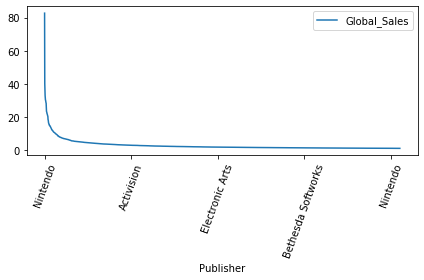

In [22]:
df.plot(x="Publisher", y="Global_Sales", rot=1)
plt.xticks(rotation=70)
plt.tight_layout()
print("Esta gráfica tiene una forma exponencial negativa. Podemos deducir que Nintendo es el que más ingresos genera.")

Esta gráfica tiene una forma exponencial negativa. Podemos deducir que el género de Sports es el que más ingresos genera.


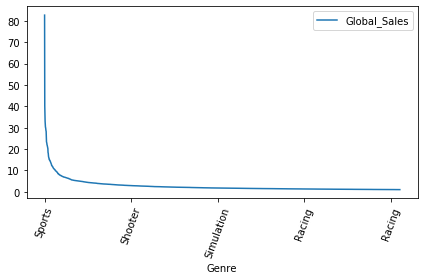

In [23]:
df.plot(x="Genre", y="Global_Sales", rot=0)
plt.xticks(rotation=70)
plt.tight_layout()
print("Esta gráfica tiene una forma exponencial negativa. Podemos deducir que el género de Sports es el que más ingresos genera.")

En combinación con la gráfica anterior, podemos observar que aún y cuando Sports es el género que más ingresos genera en la venta de videojuegos a nivel mundial, el género que más títulos distintos vende en el top 2000 es el de Action.


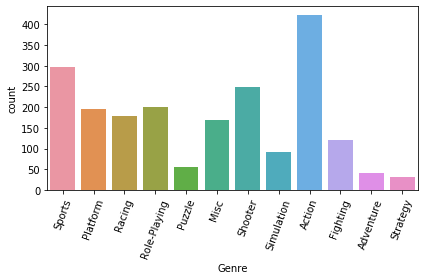

In [24]:
sns.countplot(df['Genre'])
plt.xticks(rotation=70)
plt.tight_layout()
print("En combinación con la gráfica anterior, podemos observar que aún y cuando Sports es el género que más ingresos genera en la venta de videojuegos a nivel mundial, el género que más títulos distintos vende en el top 2000 es el de Action.")

## Análisis Multivariado

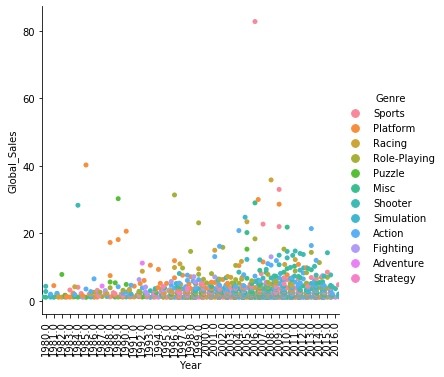

In [26]:
sns.catplot(x="Year", y="Global_Sales", hue="Genre", data=df, kind="swarm")
plt.xticks(rotation=90)
plt.show()

In [27]:
print("Lo que podemos observar en esta gráfica es que hubo un boom de videojuegos top en ventas entre el año 2005 y 2010.")

Lo que podemos observar en esta gráfica es que hubo un boom de videojuegos top en ventas entre el año 2005 y 2010.


Lo que nos dice este gráfico (que no es mucho) es que la categoría de ventas que más está relacionada con el año son las ventas en Norteamérica


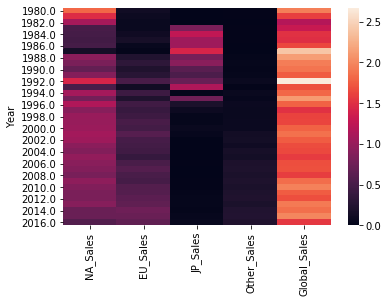

In [57]:
#Eliminamos la columna de Rank para que no meter ruido en nuestro análisis Mutivariado
dfheatmap = df.drop(columns=["Rank"])
sns.heatmap(dfheatmap.groupby(['Year']).median())
print("Lo que nos dice este gráfico (que no es mucho) es que la categoría de ventas que más está relacionada con el año son las ventas en Norteamérica")

Lo que podemos observar de esta gráfica es que el comportamiento de las ventas a través del tiempo es relativamente similar para cada uno de los países, excepto Japón que tuvo unas caídas en ventas a partir del año 1994 de las cuales no se pudo recuperar. (manteniendo las proporciones de la cantidad de ventas).


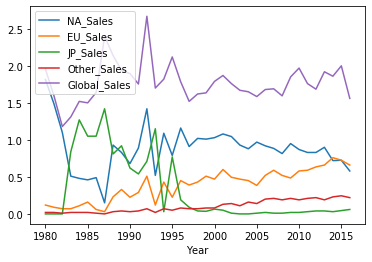

In [60]:
#Eliminamos la columna de Rank para que no meter ruido en nuestro análisis Mutivariado
dfmedianplot = df.drop(columns=["Rank"])
dfmedianplot.groupby(['Year']).median().plot.line()
print("Lo que podemos observar de esta gráfica es que el comportamiento de las ventas a través del tiempo es relativamente similar para cada uno de los países, excepto Japón que tuvo unas caídas en ventas a partir del año 1994 de las cuales no se pudo recuperar. (manteniendo las proporciones de la cantidad de ventas).")

## Key Insight

In [59]:
print("De todo lo que encontré, qué es lo más importante?")
print()
print("A mi parecer hay dos puntos clave en nuestro análisis que nos puede servir si queremos desarrollar un videojuego (y también queremos ganar mucho dinero con su venta)")
print("1. Tienes mayor probabilidad de entrar al top de ventas creando un videojuego de Action.")
print("2. El mercado con mayor impacto en ventas a nivel mundial es el de Norteamérica.")
print()
print("Si queremos desarrollar un videojuego nuevo, tenemos que hacerlo de Acción y enfocar nuestros mayores esfuerzos de locación, marketing, etc. en el mercado Norteamericano.")

De todo lo que encontré, qué es lo más importante?

A mi parecer hay dos puntos clave en nuestro análisis que nos puede servir si queremos desarrollar un videojuego (y también queremos ganar mucho dinero con su venta)
1. Tienes mayor probabilidad de entrar al top de ventas creando un videojuego de Action.
2. El mercado con mayor impacto en ventas a nivel mundial es el de Norteamérica.

Si queremos desarrollar un videojuego nuevo, tenemos que hacerlo de Acción y enfocar nuestros mayores esfuerzos de locación, marketing, etc. en el mercado Norteamericano.
